In [1]:
import os
os.chdir("/home/dat/Workspace/sd-maskrcnn")

import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
import tools.train
from autolab_core import YamlConfig
from mrcnn import model as modellib
from sd_maskrcnn.config import MaskConfig
from tools.evaluate import detect
from tools.resize import scale_to_square
%matplotlib inline

Unable to import DataStreamSyncer and Recorder! Likely due to missing multiprocess


Using TensorFlow backend.


In [2]:
mode = "YDD"
config = YamlConfig("cfg/train.yaml")
config["dataset"]["images"] = f"{mode}_ims"
config["model"]["settings"]["name"] = f"sdmaskrcnn_finetune_{mode}"
config["save_conf_name"] = f"sdmaskrcnn_finetune_{mode}_00.yaml"

In [3]:
tools.train.train(config)


Configurations:
BACKBONE                       resnet35
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
  3/150 [..............................] - ETA: 1:52:22 - loss: 2.2868 - rpn_class_loss: 0.0683 - rpn_bbox_loss: 0.4651 - mrcnn_class_loss: 0.5197 - mrcnn_bbox_loss: 0.4532 - mrcnn_mask_loss: 0.7805

/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (1.547484). Check your callbacks.
  % delta_t_median)


  4/150 [..............................] - ETA: 1:24:45 - loss: 2.2273 - rpn_class_loss: 0.0651 - rpn_bbox_loss: 0.4392 - mrcnn_class_loss: 0.5040 - mrcnn_bbox_loss: 0.4440 - mrcnn_mask_loss: 0.7750

/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.792091). Check your callbacks.
  % delta_t_median)


150/150 [==============================] - 391s 3s/step - loss: 1.3215 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.2886 - mrcnn_class_loss: 0.2676 - mrcnn_bbox_loss: 0.3292 - mrcnn_mask_loss: 0.4019 - val_loss: 1.4167 - val_rpn_class_loss: 0.0473 - val_rpn_bbox_loss: 0.3424 - val_mrcnn_class_loss: 0.2731 - val_mrcnn_bbox_loss: 0.3992 - val_mrcnn_mask_loss: 0.3546
Epoch 2/10
150/150 [==============================] - 129s 861ms/step - loss: 0.8526 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 0.2089 - mrcnn_class_loss: 0.1412 - mrcnn_bbox_loss: 0.2140 - mrcnn_mask_loss: 0.2743 - val_loss: 1.1101 - val_rpn_class_loss: 0.0200 - val_rpn_bbox_loss: 0.3276 - val_mrcnn_class_loss: 0.1630 - val_mrcnn_bbox_loss: 0.2880 - val_mrcnn_mask_loss: 0.3114
Epoch 3/10
150/150 [==============================] - 128s 850ms/step - loss: 0.7684 - rpn_class_loss: 0.0099 - rpn_bbox_loss: 0.1894 - mrcnn_class_loss: 0.0992 - mrcnn_bbox_loss: 0.1941 - mrcnn_mask_loss: 0.2758 - val_loss: 1.3894 - val_rpn_class_loss: 

In [5]:
config = YamlConfig("cfg/benchmark.yaml")
config["model"]["path"] = "models/sdmaskrcnn_finetune_ydd20181220T1109/mask_rcnn_sdmaskrcnn_finetune_ydd_0010.h5"

inference_config = MaskConfig(config["model"]["settings"])
inference_config.GPU_COUNT = 1
inference_config.IMAGES_PER_GPU = 1

model_dir, _ = os.path.split(config['model']['path'])
model = modellib.MaskRCNN(mode=config['model']['mode'], config=inference_config, model_dir=model_dir)
print("Loading weights from ", config['model']['path'])
model.load_weights(config['model']['path'], by_name=True)

Loading weights from  models/sdmaskrcnn_finetune_ydd20181220T1109/mask_rcnn_sdmaskrcnn_finetune_ydd_0010.h5
Re-starting from epoch 10


{'rois': array([[186, 188, 267, 272],
       [191, 282, 259, 360],
       [247, 245, 294, 303],
       [281, 278, 334, 326],
       [236, 279, 262, 323],
       [247, 290, 326, 367],
       [217, 228, 241, 257],
       [222, 327, 259, 360],
       [194, 281, 235, 317]], dtype=int32), 'scores': array([0.99999475, 0.9994019 , 0.9981047 , 0.99577856, 0.99220943,
       0.98085964, 0.7948107 , 0.7853106 , 0.72532463], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 9)


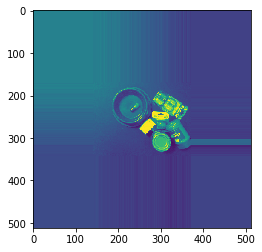

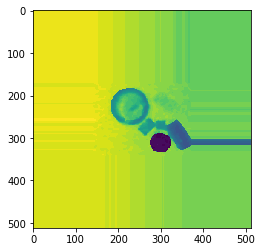

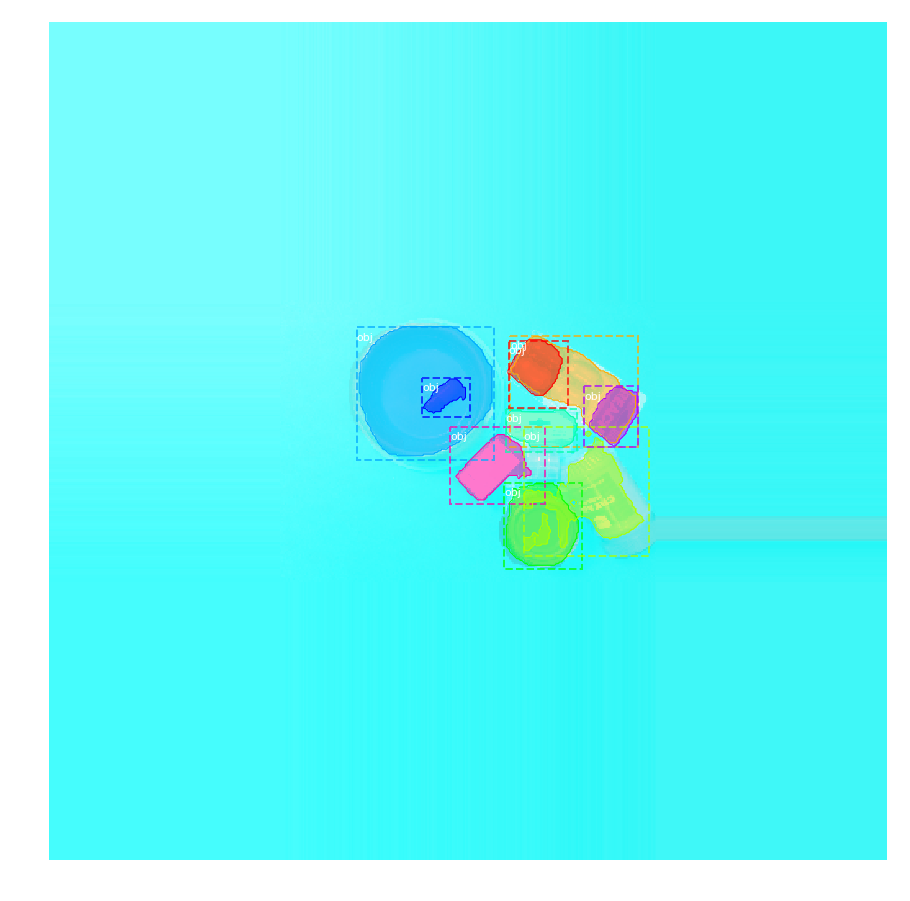

{'rois': array([[199, 231, 236, 306],
       [237, 251, 295, 338],
       [295, 230, 340, 257],
       [291, 282, 337, 332],
       [218, 190, 235, 234],
       [222, 336, 245, 351]], dtype=int32), 'scores': array([0.9997255 , 0.9983525 , 0.99708325, 0.9933569 , 0.8600478 ,
       0.8118846 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 6)


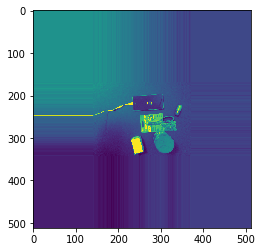

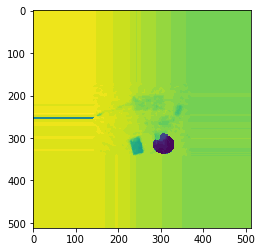

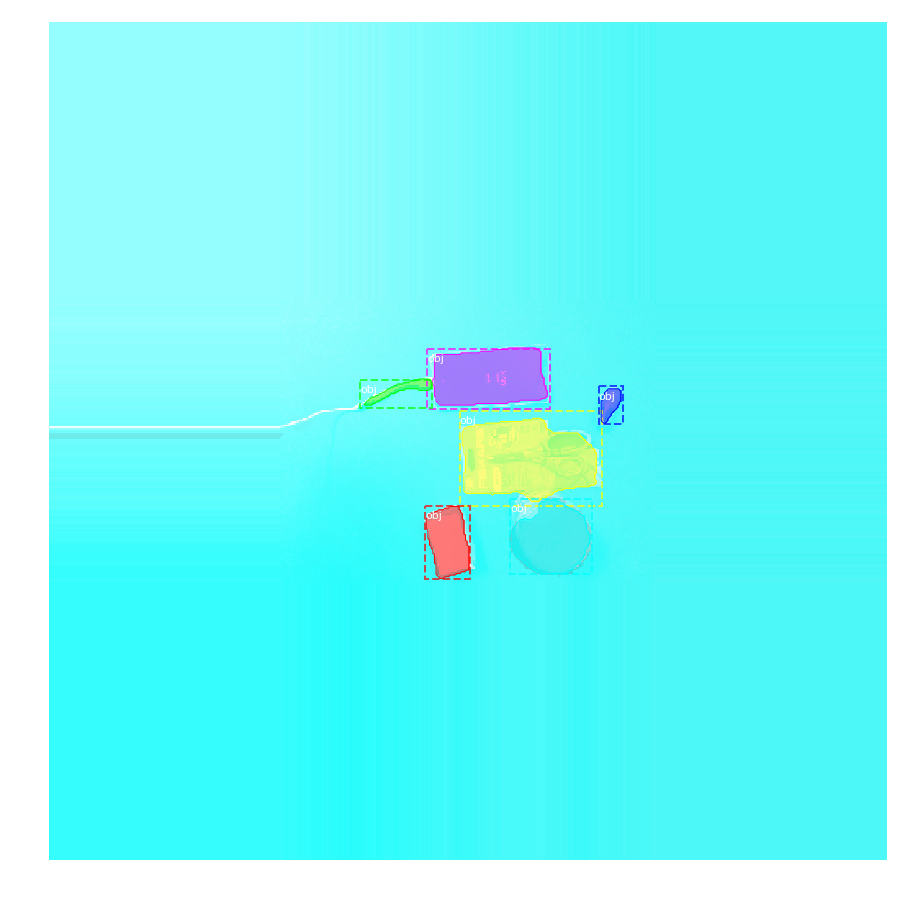

{'rois': array([[204, 213, 293, 377],
       [  0, 311, 194, 338],
       [248, 204, 275, 250],
       [293, 267, 331, 316],
       [256, 348, 299, 503],
       [206, 204, 235, 275],
       [299, 268, 322, 286],
       [213, 286, 242, 316],
       [198, 204, 228, 339]], dtype=int32), 'scores': array([0.9999862 , 0.99843913, 0.9699611 , 0.9657837 , 0.92354304,
       0.9091292 , 0.9077066 , 0.83999586, 0.8195325 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 9)


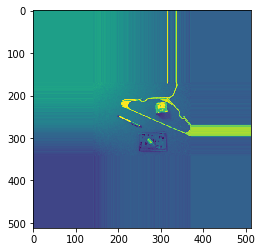

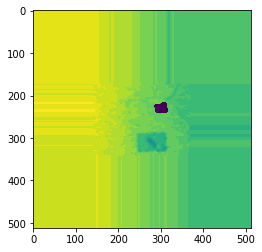

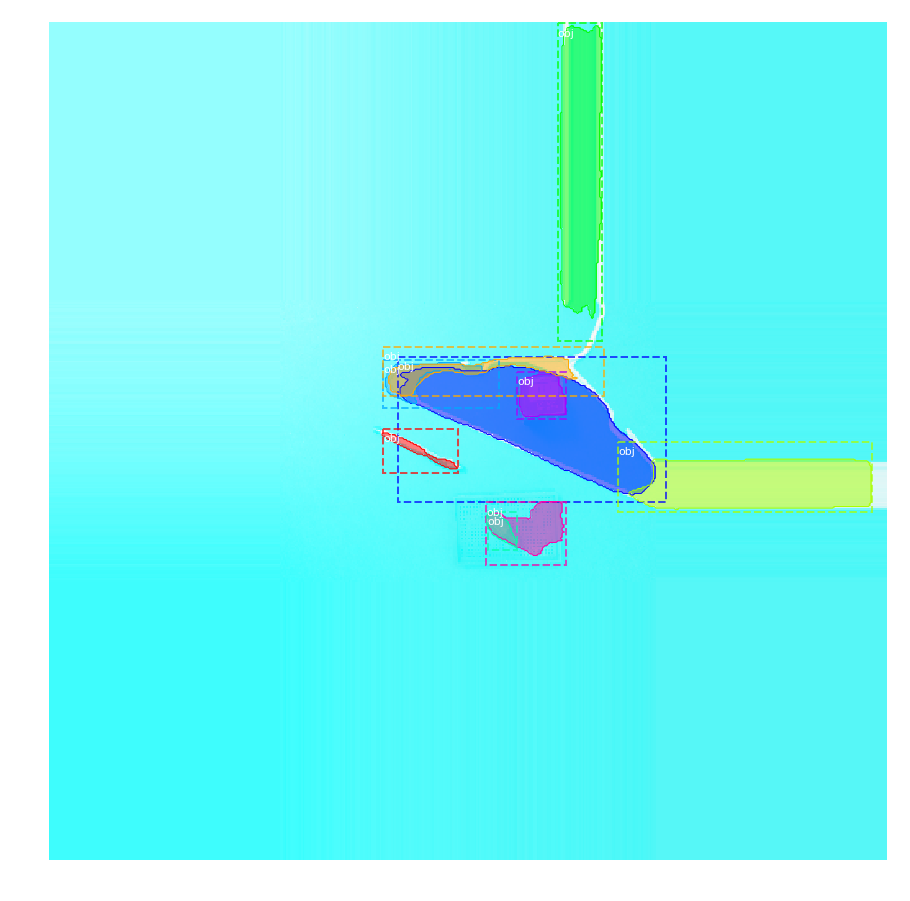

{'rois': array([[257, 201, 310, 275],
       [224, 329, 247, 351],
       [216, 277, 314, 335],
       [210, 235, 259, 273],
       [214, 207, 288, 272]], dtype=int32), 'scores': array([0.9999262 , 0.99892324, 0.99880767, 0.99107903, 0.8556985 ],
      dtype=float32), 'class_ids': array([1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 5)


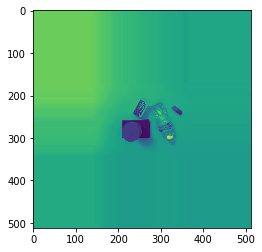

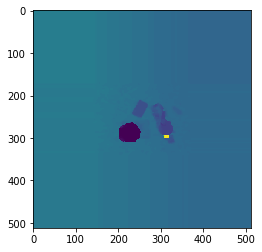

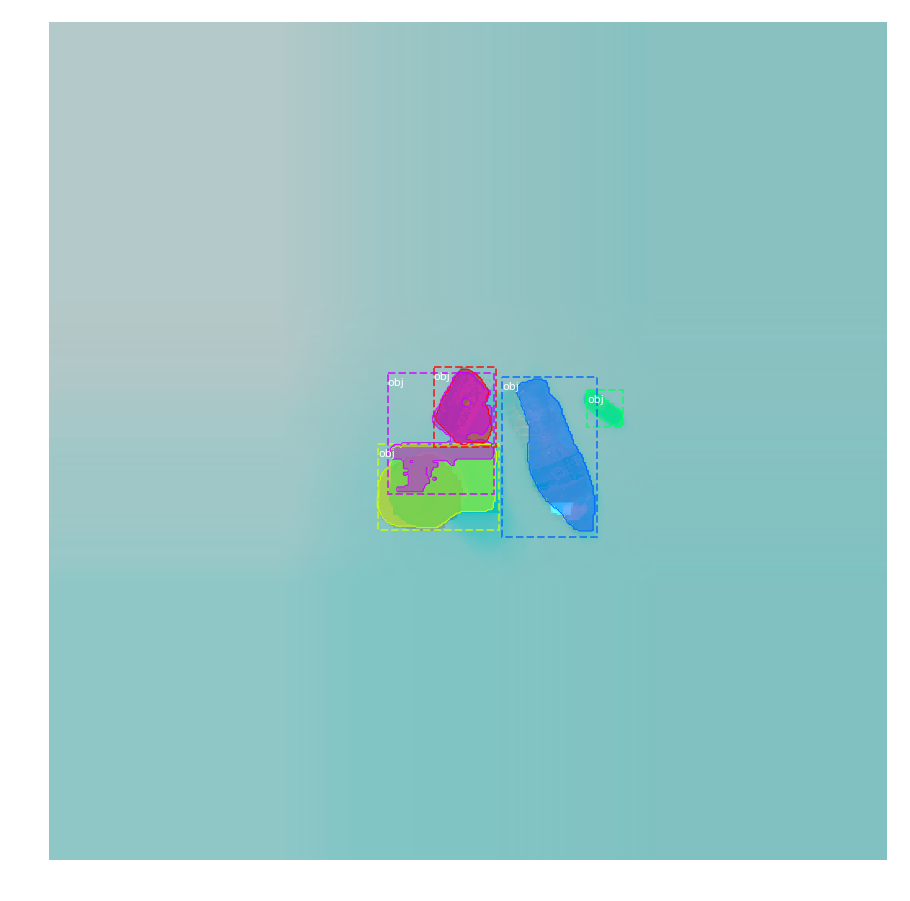

{'rois': array([[231, 322, 316, 366],
       [218, 214, 308, 305],
       [272, 256, 310, 301]], dtype=int32), 'scores': array([0.9999716 , 0.99990416, 0.8226225 ], dtype=float32), 'class_ids': array([1, 1, 1], dtype=int32)}
(512, 512, 3)


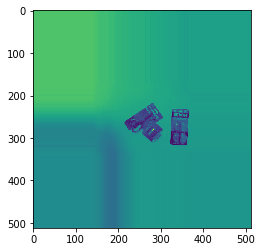

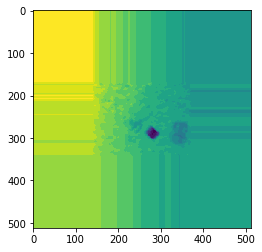

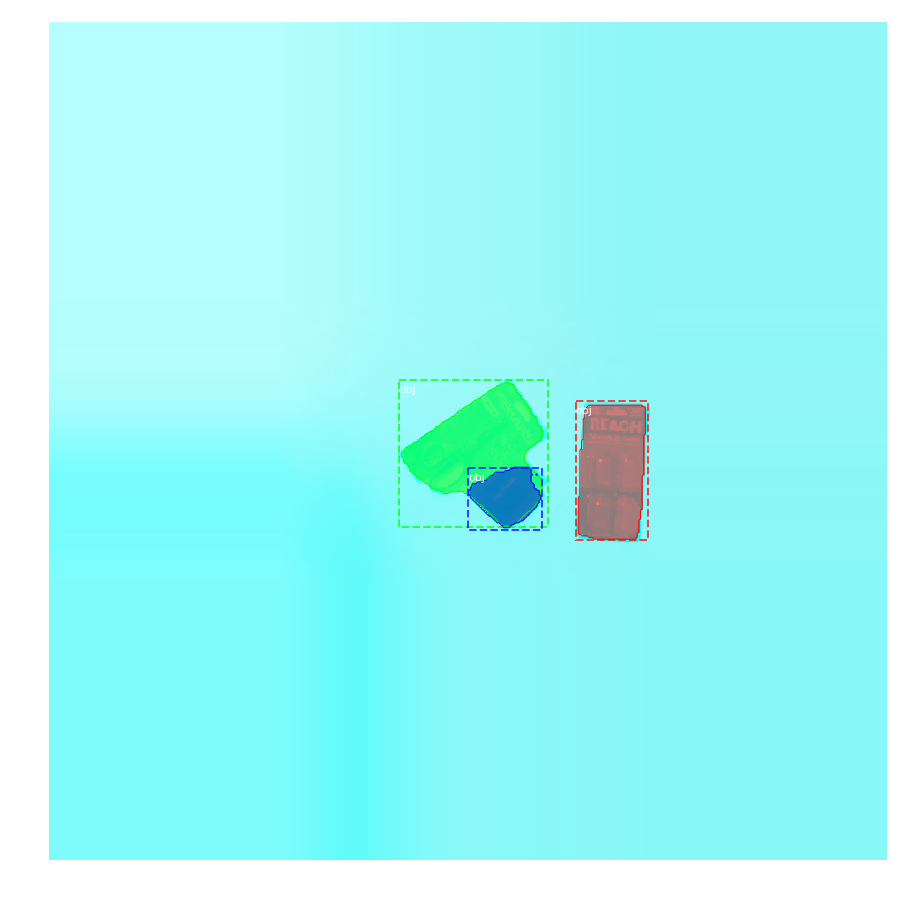

{'rois': array([[216, 240, 315, 340],
       [216, 336, 250, 368],
       [214, 262, 252, 370]], dtype=int32), 'scores': array([0.9999825 , 0.99884015, 0.8947447 ], dtype=float32), 'class_ids': array([1, 1, 1], dtype=int32)}
(512, 512, 3)


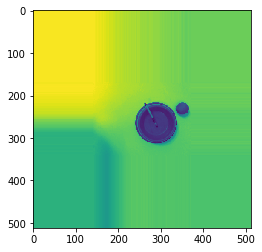

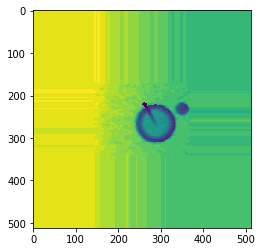

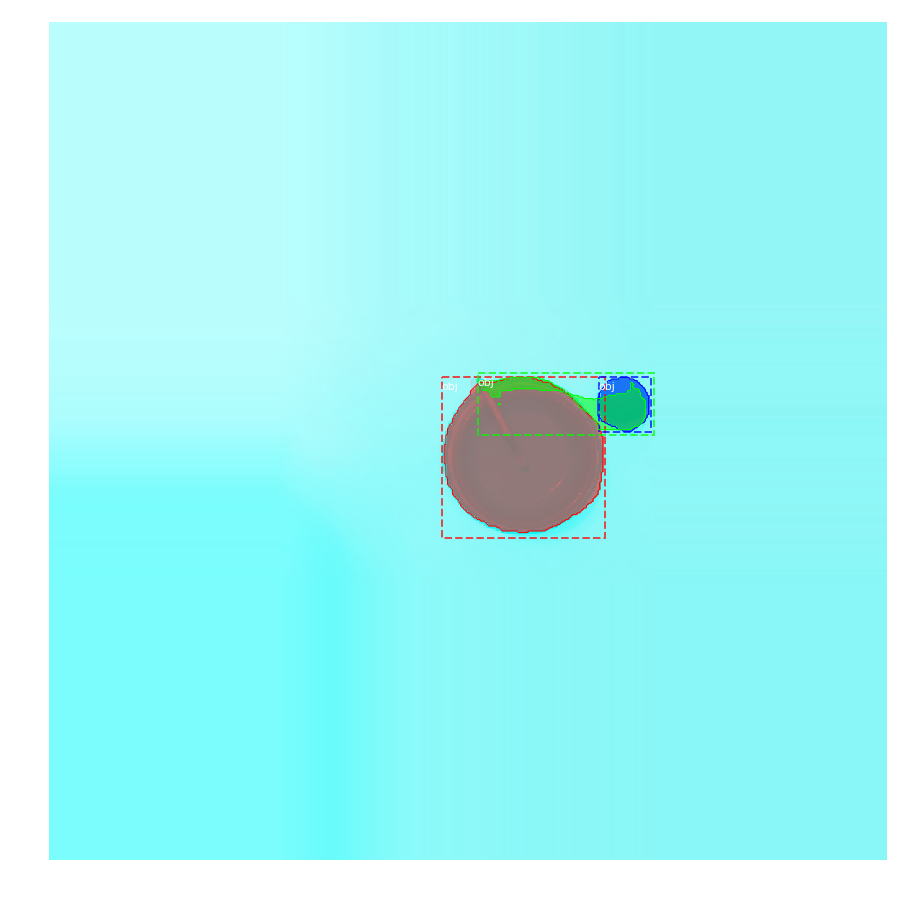

{'rois': array([[178, 187, 274, 291],
       [225, 187, 285, 368],
       [252, 262, 277, 304]], dtype=int32), 'scores': array([0.99848384, 0.9982687 , 0.9845389 ], dtype=float32), 'class_ids': array([1, 1, 1], dtype=int32)}
(512, 512, 3)


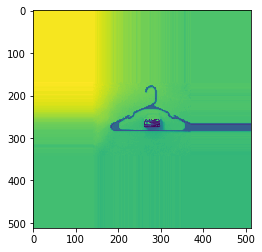

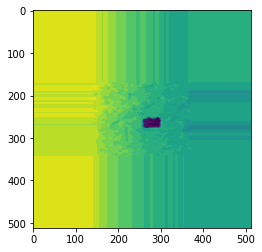

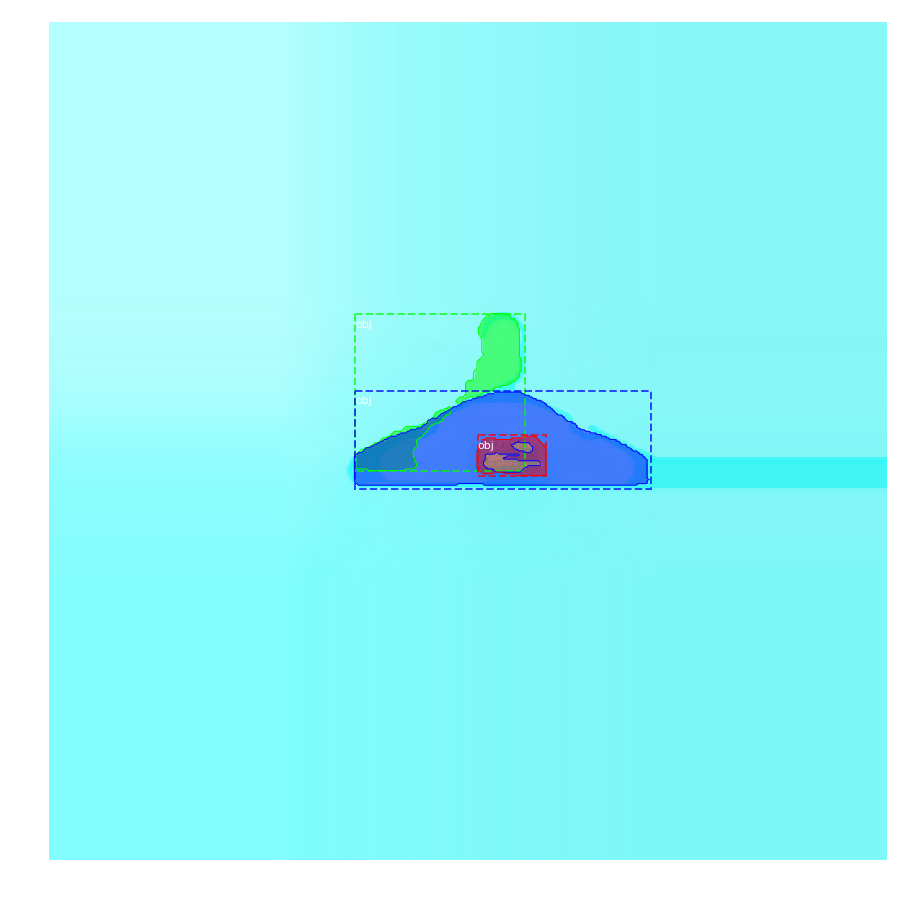

{'rois': array([[260, 319, 288, 353],
       [211, 258, 255, 306],
       [272, 246, 303, 302],
       [217, 255, 299, 340]], dtype=int32), 'scores': array([0.9999316, 0.9995409, 0.9982486, 0.891578 ], dtype=float32), 'class_ids': array([1, 1, 1, 1], dtype=int32)}
(512, 512, 4)


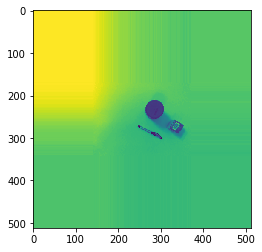

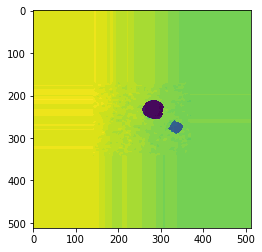

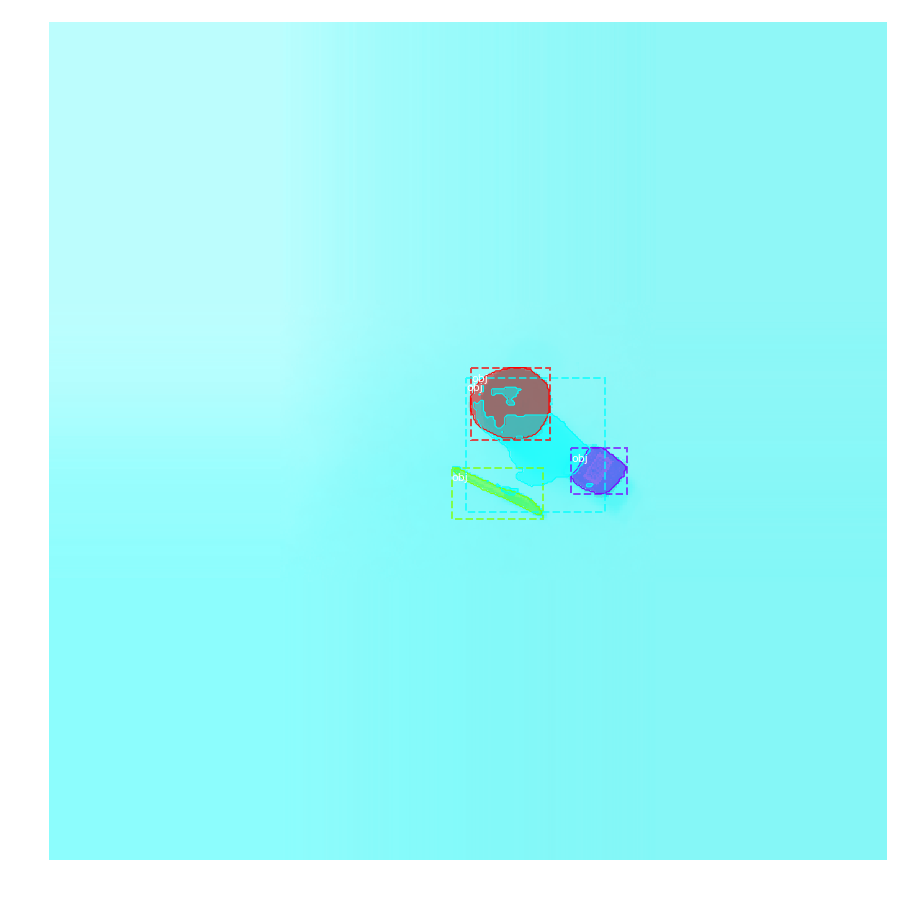

In [43]:
from mrcnn import visualize
COLOR_DIR = "data/color"
DEPTH_DIR = "data/depth"



def detect(model, image):
    results = model.detect([image], verbose=0)
    r = results[0]
    
    # Save info
    r_info = {
        'rois': r['rois'],
        'scores': r['scores'],
        'class_ids': r['class_ids']
    }
    print(r_info)
    print(r["masks"].shape)
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], ['bg', 'obj'])
    plt.savefig("masked.png")
    plt.show()


for fname in sorted(os.listdir(COLOR_DIR)):
    color = scale_to_square(cv2.imread(os.path.join(COLOR_DIR, fname)))[..., ::-1]
    depth = scale_to_square(cv2.imread(os.path.join(DEPTH_DIR, fname)))[..., 0]
    
    h, w, _ = color.shape
    depth = cv2.resize(depth, (int(w / 2.2), int(h / 2.2)), interpolation=cv2.INTER_NEAREST)
    color = cv2.resize(color, (int(w / 2.2), int(h / 2.2)), interpolation=cv2.INTER_NEAREST)

    v_pad, h_pad = (512 - color.shape[0]) // 2, (512 - color.shape[1]) // 2
    color = cv2.copyMakeBorder(color, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_REPLICATE)
    depth = cv2.copyMakeBorder(depth, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_REPLICATE)
    gray = (skimage.color.rgb2gray(color) * 255).astype(np.uint8)
    
    plt.figure()
    plt.imshow(gray)
    plt.figure()
    plt.imshow(depth)
    
    inp_img = np.zeros((512, 512, 3))
    inp_img[..., 0] = gray
    inp_img[..., 1] = depth
    inp_img[..., 2] = depth
    detect(model, inp_img)